# Recurrent Neural Network

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim 
from torch.utils.data import Dataset, DataLoader

In [10]:
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    return "Done"

set_seed(42)

'Done'

# Basic Knowledge

In [11]:
# ╔══════════════════════════╦═══════════════════════════════╦════════════════════╦═════════════════════════╗
# ║        Data type         ║             dtype             ║     CPU tensor     ║       GPU tensor        ║
# ╠══════════════════════════╬═══════════════════════════════╬════════════════════╬═════════════════════════╣
# ║ 32-bit floating point    ║ torch.float32 or torch.float  ║ torch.FloatTensor  ║ torch.cuda.FloatTensor  ║
# ║ 64-bit floating point    ║ torch.float64 or torch.double ║ torch.DoubleTensor ║ torch.cuda.DoubleTensor ║
# ║ 16-bit floating point    ║ torch.float16 or torch.half   ║ torch.HalfTensor   ║ torch.cuda.HalfTensor   ║
# ║ 8-bit integer (unsigned) ║ torch.uint8                   ║ torch.ByteTensor   ║ torch.cuda.ByteTensor   ║
# ║ 8-bit integer (signed)   ║ torch.int8                    ║ torch.CharTensor   ║ torch.cuda.CharTensor   ║
# ║ 16-bit integer (signed)  ║ torch.int16 or torch.short    ║ torch.ShortTensor  ║ torch.cuda.ShortTensor  ║
# ║ 32-bit integer (signed)  ║ torch.int32 or torch.int      ║ torch.IntTensor    ║ torch.cuda.IntTensor    ║
# ║ 64-bit integer (signed)  ║ torch.int64 or torch.long     ║ torch.LongTensor   ║ torch.cuda.LongTensor   ║
# ║ Boolean                  ║ torch.bool                    ║ torch.BoolTensor   ║ torch.cuda.BoolTensor   ║
# ╚══════════════════════════╩═══════════════════════════════╩════════════════════╩═════════════════════════╝

In [12]:
# RNN 
 # Input data: RNN should have 3 dimensions. (Batch Size, Sequence Length and Input Dimension)
 # If we don't initialize the hidden layer, it will be auto-initiliased by PyTorch to be all zeros
 # NO need to set hidden or chnage it as it will be automatically done by pytorch 
 # V.Imp to concentrate on shapes of input, output and hidden.
 # Ouput can be drawn from hidden and output hidden is the last stage of 
    
    
# hidden size we can define as 32, 64, 128 (again better in 2’s power) and 
# input size is a number of features in our data (input dimension). 
# Here input size is 2 for data type 2 and 1 for data type 1.

In [13]:
array = np.linspace(0,119,120)
print(array)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119.]


In [14]:
test_size = 20
train_set = array[:-test_size]
test_set = array[-test_size:]

In [15]:
print(train_set)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]


In [16]:
print(test_set)

[100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113.
 114. 115. 116. 117. 118. 119.]


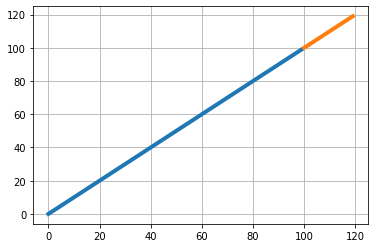

In [17]:
plt.plot(train_set,linewidth=4)
plt.grid(True)
plt.plot(test_set,range(100,120),linewidth=4)

# Create Input Data

In [18]:
def input_data(data,ws):
    out = []
    
    for i in range(len(data)-ws):
        feature = data[i:i+ws+1]
        out.append(feature)
        
    df = pd.DataFrame(out)
    return df

In [19]:
class CustomDatasetTrain(Dataset):
    def __init__(self):
        self.df = input_data(train_set,3)
        self.x = torch.from_numpy(self.df.drop(3,axis=1).to_numpy()).float()
        self.y = torch.from_numpy(self.df[3].to_numpy()).float()
        self.n_sample = self.df.shape[0]

    def __getitem__(self, index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.n_sample
    
train_data= CustomDatasetTrain()

In [20]:
class CustomDatasetTest(Dataset):
    def __init__(self):
        self.df = input_data(test_set,3)
        self.x = torch.from_numpy(self.df.drop(3,axis=1).to_numpy()).float()
        self.y = torch.from_numpy(self.df[3].to_numpy()).float()
        self.n_sample = self.df.shape[0]

    def __getitem__(self, index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.n_sample
    
test_data = CustomDatasetTest()

In [21]:
train_loader = DataLoader(train_data,4,True)
test_loader = DataLoader(test_data,4)

In [22]:
for data in train_loader:
    print(data[0].reshape(-1,3,1))
    break

tensor([[[85.],
         [86.],
         [87.]],

        [[38.],
         [39.],
         [40.]],

        [[53.],
         [54.],
         [55.]],

        [[22.],
         [23.],
         [24.]]])


# Model Train and Evaluate 

In [47]:
class RNN(nn.Module):
    def __init__(self,input_size, hidden_size, num_layers, linear_output, batch_size, bidirectional, batch_first):
        super().__init__()
        
        self.rnn = nn.RNN(input_size = input_size, 
                          hidden_size = hidden_size, 
                          num_layers = num_layers,
                          batch_first= batch_first,
                          bidirectional = bidirectional)
        
        self.linear = nn.Linear(hidden_size,12)
        self.linear_1 = nn.Linear(12,1)
    
    def forward(self,input_data):
        input_ = input_data.reshape(-1,3,1)
        output, hidden = self.rnn(input_)
        pred = self.linear(hidden)
        pred = self.linear_1(pred)
        return pred 

In [48]:
batch_size = 5

train_loader = DataLoader(train_data,batch_size)
test_loader = DataLoader(test_data,batch_size)

model = RNN(input_size = 1,
            hidden_size =100,
            num_layers = 1,
            linear_output = 1,
            batch_size= batch_size,
            bidirectional= False,
            batch_first= True)


loss_func = nn.MSELoss()
optimizer = torch.optim.Adagrad(model.parameters(),lr=0.09)

In [49]:
print(model)

RNN(
  (rnn): RNN(1, 100, batch_first=True)
  (linear): Linear(in_features=100, out_features=12, bias=True)
  (linear_1): Linear(in_features=12, out_features=1, bias=True)
)


In [50]:
for i in model.parameters():
    print(i.shape)

torch.Size([100, 1])
torch.Size([100, 100])
torch.Size([100])
torch.Size([100])
torch.Size([12, 100])
torch.Size([12])
torch.Size([1, 12])
torch.Size([1])


In [51]:
epochs = 800
loss = 0

for epoch in range(epochs):
    for data,label in train_loader:
        optimizer.zero_grad()
        
        pred = model.forward(data)
        loss = loss_func(pred,label.reshape(1,-1,1))
        loss.backward()
        
        optimizer.step()
    print(loss.item())

63.48841857910156
70.62248992919922
134.67352294921875
51.21743392944336
98.9128189086914
18.217103958129883
27.62057113647461
38.838783264160156
0.1273304969072342
0.24546663463115692
53.10490417480469
0.26748937368392944
43.86940383911133
22.889728546142578
21.522953033447266
4.021212577819824
47.92431640625
32.06867218017578
5.033869743347168
6.028655529022217
4.583581924438477
0.3296215236186981
109.16847229003906
44.643280029296875
0.7514774203300476
7.703324317932129
1.417253017425537
1.6123749017715454
1.7452383041381836
3.857795476913452
0.2710637152194977
0.3470476269721985
5.043585300445557
20.22779083251953
14.757387161254883
3.35994815826416
0.6032449007034302
12.809320449829102
4.774388313293457
21.012243270874023
3.6650123596191406
0.9819157719612122
0.5748206377029419
25.18695068359375
35.20389175415039
26.281246185302734
11.174768447875977
7.016052722930908
0.8321797847747803
4.399282932281494
1.1926767826080322
9.530858039855957
31.964269638061523
24.40719223022461
58.

0.00025435397401452065
0.0002522805007174611
0.0002507367462385446
0.0002485091390553862
0.00024697306798771024
0.00024663895601406693
0.0002434181806165725
0.00024207087699323893
0.00024224192020483315
0.00023939134553074837
0.00023905784473754466
0.00023722651530988514
0.00023589987540617585
0.00023606445756740868
0.00023276975844055414
0.00023260066518560052
0.00023161788703873754
0.00022885261569172144
0.00022884609643369913
0.00022626447025686502
0.00022594002075493336
0.00022465386427938938
0.00022353633539751172
0.00022273906506597996
0.00022131091100163758
0.0002192651154473424
0.00021988246589899063
0.0002170760417357087
0.00021644533262588084
0.00021705054678022861
0.00021457337425090373
0.0002134990063495934
0.00021318919607438147
0.00021151025430299342
0.00021075646509416401
0.0002101430727634579
0.0002085056621581316
0.00020774200675077736
0.00020610936917364597
0.00020491995383054018
0.0002044977736659348
0.00020331732230260968
0.00020246702479198575
0.0002015943464357406

0.03258650004863739
0.032450977712869644
0.03230922296643257
0.03218001872301102
0.0320468544960022
0.03191173076629639
0.03177914023399353
0.031645338982343674
0.031512945890426636
0.03138384968042374
0.031246770173311234
0.031118597835302353
0.03098808228969574
0.030859336256980896


# Evaluation Stage

In [52]:
model.eval()
loss = 0
batch = 0
original = []
predi = []
with torch.no_grad():
    for data, label in test_loader:
        pred = model.forward(data)
        original.extend(label.tolist())
        predi.extend(pred[0].reshape(1,-1).tolist())
        loss += loss_func(pred,label.reshape(1,-1,1))
        print(label,pred)
        batch+=1
        
    print(f"Loss : {loss/batch}")
    

tensor([103., 104., 105., 106., 107.]) tensor([[[ 99.5303],
         [ 99.8191],
         [100.2595],
         [100.8658],
         [101.6289]]])
tensor([108., 109., 110., 111., 112.]) tensor([[[102.5274],
         [103.5414],
         [104.6556],
         [105.8568],
         [107.1301]]])
tensor([113., 114., 115., 116., 117.]) tensor([[[108.4579],
         [109.8232],
         [111.2146],
         [112.6302],
         [114.0779]]])
tensor([118., 119.]) tensor([[[115.5726],
         [117.1305]]])
Loss : 17.07216453552246


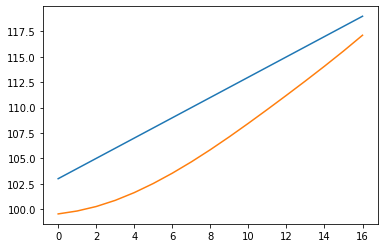

In [53]:
test = []
for i in predi:
    test.extend(i)

# test = [int(i) for i in test]
plt.plot(original)
plt.plot(test)

In [411]:
rnn = nn.RNN(1, 1, 1)
input = torch.randn(3, 2, 1)
h0 = torch.randn(1, 2, 1)
output, hn = rnn(input, h0)

In [412]:
output

tensor([[[ 0.8580],
         [-0.0834]],

        [[ 0.8414],
         [ 0.6327]],

        [[ 0.9727],
         [ 0.9349]]], grad_fn=<StackBackward0>)

In [413]:
hn

tensor([[[0.9727],
         [0.9349]]], grad_fn=<StackBackward0>)